<h1> Merge Sort</h1>

In [2]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [3]:
def mergeSort(lista):
    if len(lista)>1:
        medio = len(lista)//2
        izquierda = lista[:medio]
        derecha = lista[medio:]

        mergeSort(izquierda)
        mergeSort(derecha)

        i=0
        j=0
        k=0
        while i < len(izquierda) and j < len(derecha):
            if izquierda[i] < derecha[j]:
                lista[k]=izquierda[i]
                i=i+1
            else:
                lista[k]=derecha[j]
                j=j+1
            k=k+1

        while i < len(izquierda):
            lista[k]=izquierda[i]
            i=i+1
            k=k+1

        while j < len(derecha):
            lista[k]=derecha[j]
            j=j+1
            k=k+1


In [4]:
B = np.random.permutation(range(0,10))
print B
mergeSort(B)
print B

[2 4 6 3 8 7 1 9 0 5]
[0 0 0 0 0 0 0 0 0 5]


<h2>Correctitud</h2>
<b>invariante:</b>

In [5]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    print "Comparando ", A," con ", original_A
    return l1 == l2

In [6]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

Comparando  [1, 2, 3, 4]  con  [4, 3, 2, 1]
True
Comparando  [1, 2, 3, 4]  con  [5, 3, 2, 1]
False


In [7]:
def mergeSort_Invariant(lista):
    original_A = list(lista)
    if len(lista)>1:
        medio = len(lista)//2
        izquierda = lista[:medio]
        derecha = lista[medio:]

        mergeSort_Invariant(izquierda)
        mergeSort_Invariant(derecha)

        i=0
        j=0
        k=0
        while i < len(izquierda) and j < len(derecha):
            if izquierda[i] < derecha[j]:
                lista[k]=izquierda[i]
                i=i+1
            else:
                lista[k]=derecha[j]
                j=j+1
            k=k+1

        while i < len(izquierda):
            lista[k]=izquierda[i]
            i=i+1
            k=k+1

        while j < len(derecha):
            lista[k]=derecha[j]
            j=j+1
            k=k+1
        print invariant(lista, original_A)

In [8]:
B = [9,1,8,2,7,3,6,5,4,0]
print B
mergeSort_Invariant(B)
print B

[9, 1, 8, 2, 7, 3, 6, 5, 4, 0]
Comparando  [1, 9]  con  [9, 1]
True
Comparando  [2, 7]  con  [2, 7]
True
Comparando  [2, 7, 8]  con  [8, 2, 7]
True
Comparando  [1, 2, 7, 8, 9]  con  [9, 1, 8, 2, 7]
True
Comparando  [3, 6]  con  [3, 6]
True
Comparando  [0, 4]  con  [4, 0]
True
Comparando  [0, 4, 5]  con  [5, 4, 0]
True
Comparando  [0, 3, 4, 5, 6]  con  [3, 6, 5, 4, 0]
True
Comparando  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  con  [9, 1, 8, 2, 7, 3, 6, 5, 4, 0]
True
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


<h2> Análisis del tiempo de ejecución</h2>

In [42]:
class Counter:
   
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps


def mergeSort_Cont(lista, cont):
    cont.count()
    if len(lista)>1:
        cont.count()
        medio = len(lista)//2
        cont.count()
        izquierda = lista[:medio]
        cont.count()
        derecha = lista[medio:]
        cont.count()
        mergeSort_Cont(izquierda,cont)
        cont.count()
        mergeSort_Cont(derecha,cont)
        cont.count()
        
        i=0
        j=0
        k=0
        while i < len(izquierda) and j < len(derecha):
            cont.count()
            if izquierda[i] < derecha[j]:
                cont.count()
                lista[k]=izquierda[i]
                cont.count()
                i=i+1
                cont.count()
            else:
                cont.count()
                lista[k]=derecha[j]
                cont.count()
                j=j+1
                cont.count()
            k=k+1
            cont.count()
        while i < len(izquierda):
            cont.count()
            lista[k]=izquierda[i]
            cont.count()
            i=i+1
            cont.count()
            k=k+1
            cont.count()
        while j < len(derecha):
            cont.count()
            lista[k]=derecha[j]
            cont.count()
            j=j+1
            cont.count()
            k=k+1
            cont.count()

In [43]:
lista =[9,7,5,3,1,2,6,4,8]
num = Counter()
mergeSort_Cont(lista,num)
num.print_steps()

Number of steps = 199


<h2>Análisis experimental</h2>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función mergeSort_cont(l, acct) y contabiliza el número de pasos.

In [44]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        mergeSort_Cont(l, acct)
        results.append(acct.steps)
    return results

In [45]:
print exper_analysis(10)

[1, 1, 18, 40, 62, 89, 115, 143, 168, 201]


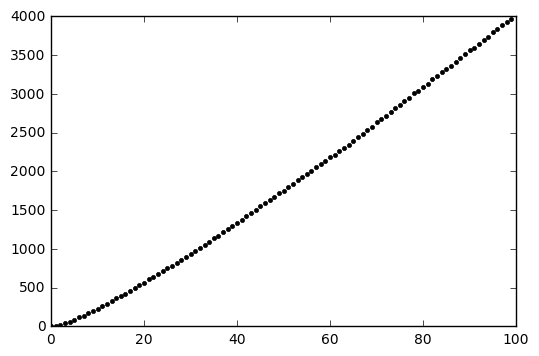

In [46]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

<h2> Tiempo de ejecucion</h2>
Haciendo uso de la funcion time_analysis(n) se toma el tiempo para los distintos tamaños de arreglos desde 1 hasta n

In [34]:
import time
import random as rnd
def time_analysis(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        t_inicial=time.clock()
        mergeSort(l)
        t_final= time.clock()
        t_total=t_final-t_inicial
        results.append(t_total*1000000)
    return results



In [35]:
print time_analysis(10)

[1.6553627517623681, 0.6621450836519216, 3.641798059561552, 4.966088226865395, 6.952523534664579, 9.270031370078868, 11.587539233914868, 13.905047069329157, 16.222554904743447, 19.533280408268183]


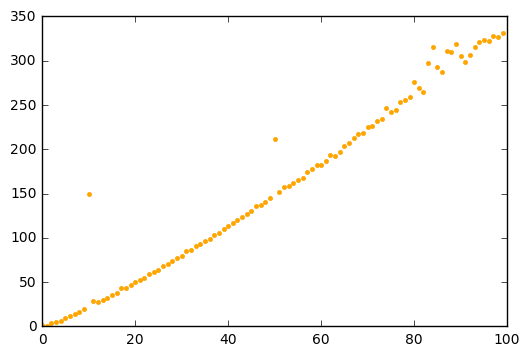

In [36]:
pl.clf()
x = np.arange(100)
y = np.array(time_analysis(100))
pl.plot(x, y, 'k.',color='orange')

<h2>Analisis Teorico</h2>

In [37]:
from math import log
def teoric_analysis(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        if(i>0):
            i=i*(log(i)/log(2))
        results.append(i)
    return results

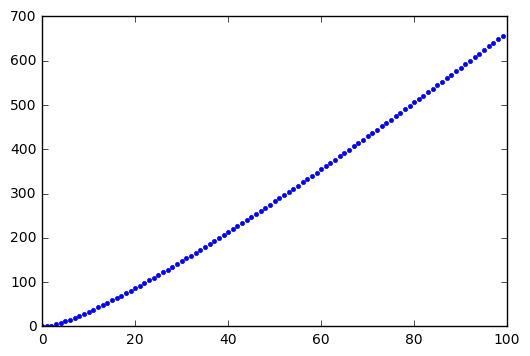

In [38]:
pl.clf()
x = np.arange(100)
y = np.array(teoric_analysis(100))
pl.plot(x, y, 'k.',color='blue')

<h1>Gráficas juntas</h1>

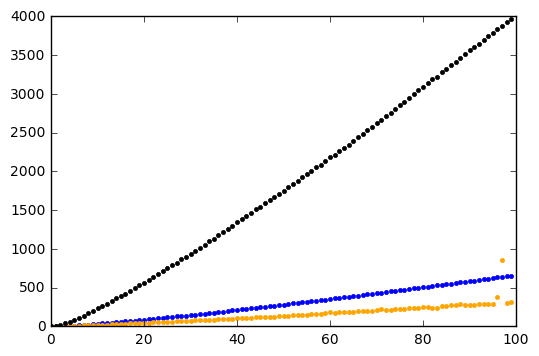

In [47]:
pl.clf()
x = np.arange(100)
y = np.array(teoric_analysis(100))
pl.plot(x, y, 'k.',color='blue')
x = np.arange(100)
y = np.array(time_analysis(100))
pl.plot(x, y, 'k.',color='orange') #Variable multiplicada por una constante muy grande
x = np.arange(100)
y = np.array(exper_analysis(100))   
pl.plot(x, y, 'k.')